In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, csv file I/O
import matplotlib.pyplot as plt
import seaborn as sns
from subprocess import check_output
import math

df = pd.read_csv('./input/cs448b_ipasn.csv')

In [2]:
df['date'] = pd.to_datetime(df['date'])
df = df.groupby(['date', 'l_ipn'], as_index=False).sum() # date와 l_ipn 별로 합을 구함
df['date']

0     2006-07-01
1     2006-07-01
2     2006-07-01
3     2006-07-01
4     2006-07-01
         ...    
842   2006-09-30
843   2006-09-30
844   2006-09-30
845   2006-09-30
846   2006-09-30
Name: date, Length: 847, dtype: datetime64[ns]

In [3]:
df['yday'] = df['date'].dt.dayofyear
df['wday'] = df['date'].dt.dayofweek

In [8]:
ip = []
maxF = []
for i in range(0, 10):
    ip.insert(i, df[df['l_ipn']==i])
    maxF.insert(i, np.max(ip[i]['f']))
ip[0].head()

,date,l_ipn,r_asn,f,yday,wday
0,2006-07-01,0,436704,106,182,5
10,2006-07-02,0,460025,920,183,6
20,2006-07-03,0,436624,249,184,0
30,2006-07-04,0,499290,2971,185,1
40,2006-07-05,0,423638,158,186,2


In [5]:
count, division = np.histogram(ip[0]['f'], bins=10)
count

array([57, 14,  7,  2,  3,  4,  2,  2,  0,  1], dtype=int64)

In [6]:
division

array([  68.,  810., 1552., 2294., 3036., 3778., 4520., 5262., 6004.,
       6746., 7488.])

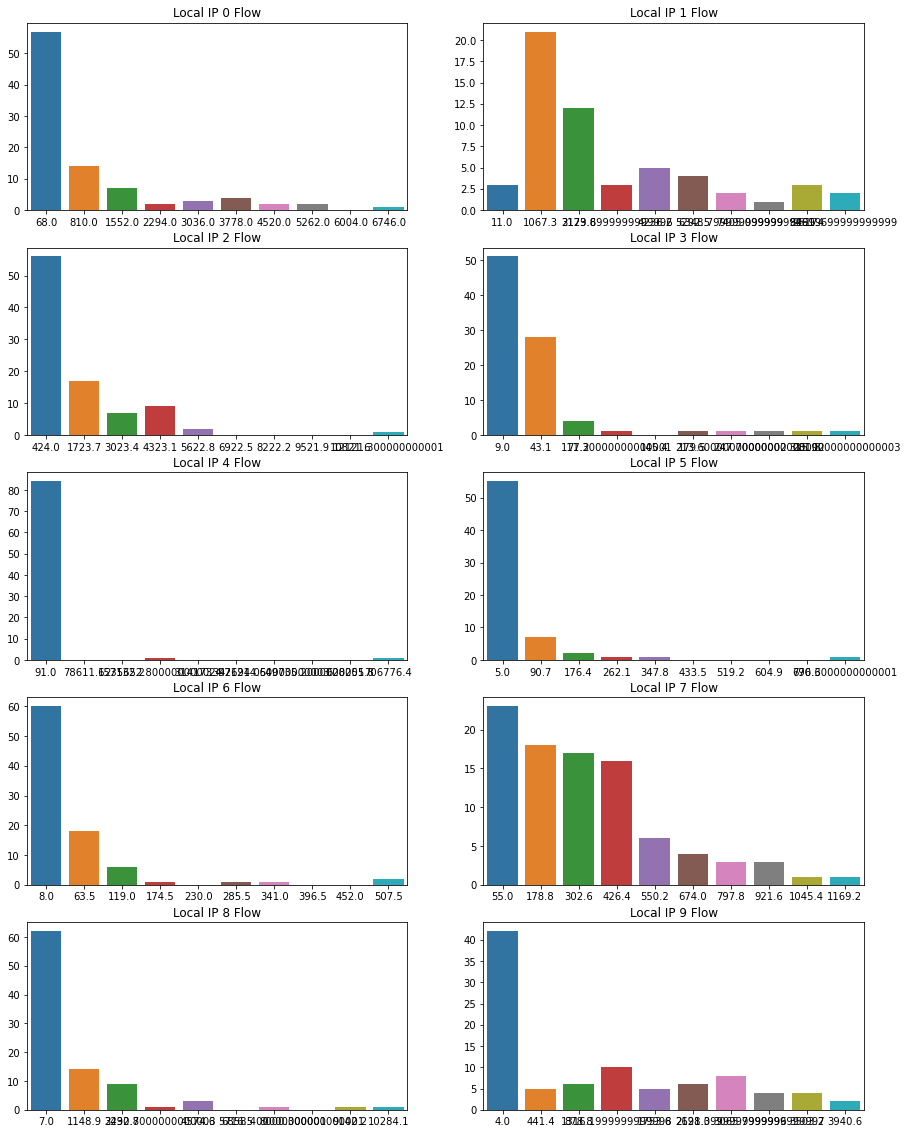

In [9]:
f, axarray = plt.subplots(5, 2, figsize=(15, 20)) # 5x2로 10개의 flow를 보일 것이다

for i in range(0, 10):
    count, division = np.histogram(ip[i]['f'], bins=10) # bins는 x축의 간격
    row, col = math.floor(i/2), i%2
    g = sns.barplot(x=division[0:len(division)-1], y=count, ax=axarray[row, col]) # (0, 0) 위치에 그래프 넣을 것
    axarray[row, col].set_title(f'Local IP {i} Flow')

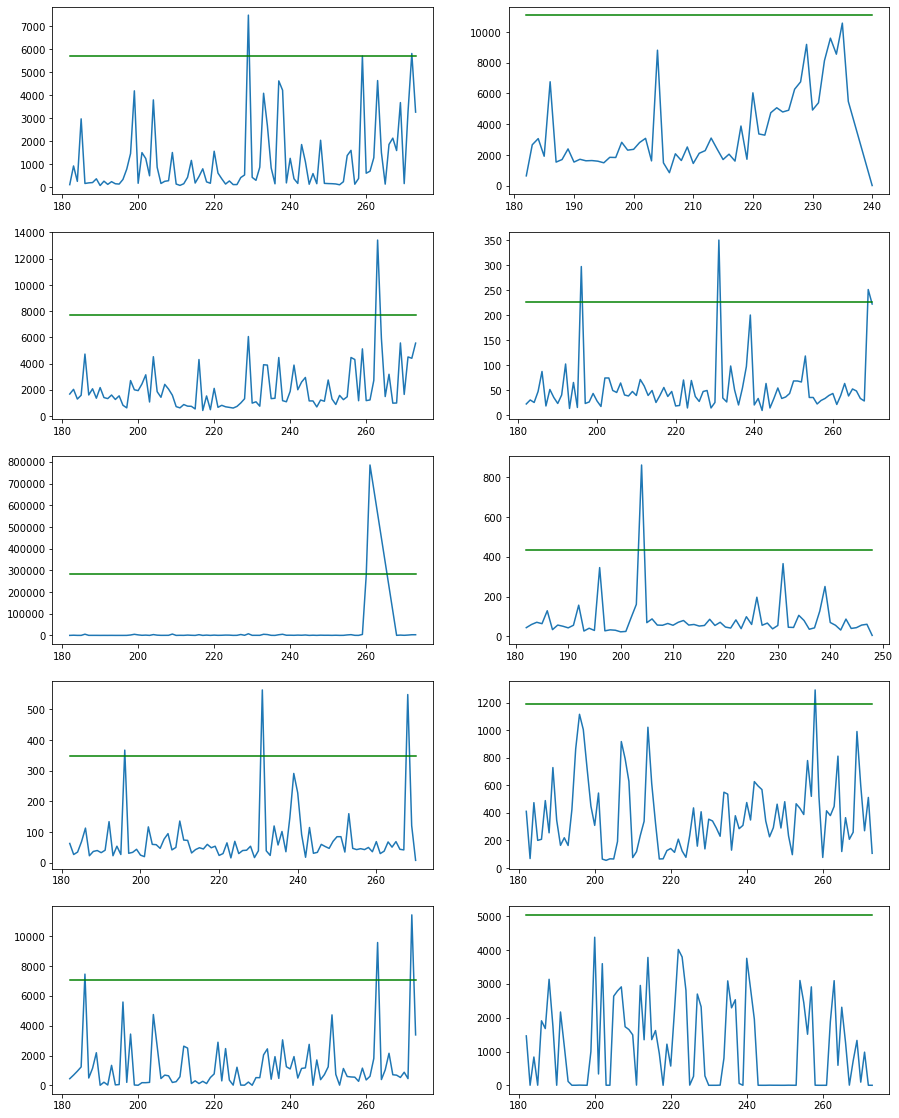

In [13]:
f, axarray = plt.subplots(5, 2, figsize=(15, 20))
for i in range(0, 10):
    row, col = math.floor(i/2), i%2
    axarray[row, col].plot(ip[i]['yday'], ip[i]['f'])
    axarray[row, col].plot(ip[i]['yday'], [ip[i]['f'].mean() + 3*ip[i]['f'].std()]*len(ip[i]['yday']), color='g')

In [14]:
ip[0] = df[df['l_ipn']==0]
maxF[0] = np.max(ip[0]['f'])
ip[1] = df[df['l_ipn']==1][0:len(ip[1]['f'])-5]
maxF[1] = np.max(ip[1]['f'])
ip[2] = df[df['l_ipn']==2]
maxF[2] = np.max(ip[2]['f'])
ip[3] = df[df['l_ipn']==3]
maxF[3] = np.max(ip[3]['f'])
ip[4] = df[df['l_ipn']==4][0:len(ip[4]['f'])-7]